In [ ]:
'''
계층적 군집분석
'''

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

replace_cm = lambda x : x.replace('(cm)', '')
replace_blank = lambda x : x.replace(' ', '_')
relplace_columns = lambda x : replace_blank(replace_cm(x))
iris_df.columns = [relplace_columns(col) for col in iris_df.columns]


X = iris_df.drop(columns='target')
y = iris_df['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Methods : 
    # 'ward' : 와드연결법, 
    # 'single' : 최단연결법, 
    # 'complete' : 최장연결법, 
    # 'average' : 평균연결법,    
    # 'centroid' : 중심연결법, 
# Metric :
    # 'euclidean': 유클리드 거리
    # 'cityblock' : 맨하탄 거리
    # 'cosine' : 코사인 거리
    # 'correlation' : 상관계수 거리

Z = linkage(X_scaled, method='complete', metric='euclidean')

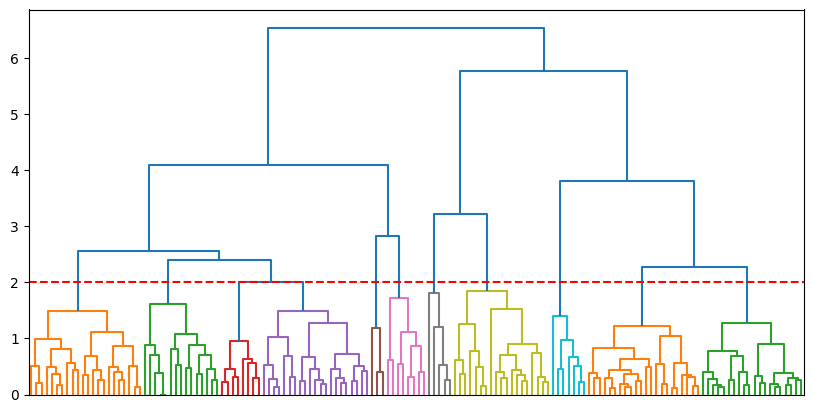

In [3]:
import matplotlib.pyplot as plt

Z = linkage(X_scaled, method='complete', metric='euclidean')


distance_setting = 2

fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, labels=iris_df.index, color_threshold=distance_setting, ax=ax, no_labels=True)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

In [ ]:
# 클러스터링 평가 
# 1. 실루엣 계수
# 2. 완전성 
# 3. V-Measure
from sklearn.metrics import silhouette_score, completeness_score, v_measure_score

n_cluster = 3

Z = linkage(X_scaled, method='complete', metric='euclidean')
hierarchical_clustering_result = cut_tree(Z, n_clusters=n_cluster).flatten()

silhouette = silhouette_score(X_scaled, hierarchical_clustering_result)
completeness = completeness_score(y, hierarchical_clustering_result)
v_measure = v_measure_score(y, hierarchical_clustering_result)

'''
- 0.7 이상: 매우 잘 된 클러스터링
- 0.5 이상: 군집화가 꽤 잘 되어 있다고 봅니다.
- 0.25~0.5: 군집화가 보통 수준
- 0.25 이하: 군집화가 좋지 않음
'''
print(f'실루엣 계수 : {silhouette}')

'''
- 0.8 이상: 거의 완전한 군집화
- 0.5~0.8: 의미 있는 군집화 가능성
- 0.5 이하: 노이즈 많거나 레이블과 군집 불일치 가능성
'''
print(f'완전성 : {completeness}')

'''
- 0.90 ~ 1.00	거의 완벽한 클러스터링. 실제 레이블과 매우 잘 일치함
- 0.75 ~ 0.90	꽤 잘 된 클러스터링. 실전에서도 좋은 성능으로 인정받음
- 0.50 ~ 0.75	보통 수준. 일부 클러스터는 잘 맞지만 전체적으로는 개선 여지 있음
- 0.30 ~ 0.50	낮은 성능. 실제 레이블과의 불일치가 많음
- 0.00 ~ 0.30	클러스터링 품질이 거의 없음. 무작위에 가까움
'''
print('V-측정 점수:', v_measure_score(y, hierarchical_clustering_result))

실루엣 계수 : 0.44961848359884726
완전성 : 0.6848895823958637
V-측정 점수: 0.6530481596015469
